In [1]:
from fastai.data.external import untar_data, URLs

path = untar_data(URLs.MNIST_SAMPLE)
path.ls() # type: ignore

(#3) [Path('/Users/mton/.fastai/data/mnist_sample/valid'),Path('/Users/mton/.fastai/data/mnist_sample/labels.csv'),Path('/Users/mton/.fastai/data/mnist_sample/train')]

In [2]:
(path/'train').ls() # type: ignore

(#2) [Path('/Users/mton/.fastai/data/mnist_sample/train/7'),Path('/Users/mton/.fastai/data/mnist_sample/train/3')]

In [3]:
threes = (path/'train'/'3').ls().sorted() # type: ignore
sevens = (path/'train'/'7').ls().sorted() # type: ignore
threes # type: ignore

(#6131) [Path('/Users/mton/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10091.png')...]

In [4]:
from fastai.vision.all import Image

# TODO : Why does three[0] display an image, but array/tensor are all Zeroes?
img3_path = threes[1]
im3 = Image.open(img3_path)
im3 # type: ignore

In [5]:
from fastai.vision.data import array

array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [8]:
from fastai.vision.data import tensor

# TODO : Add note on tensor vs. array
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
from fastai.vision.data import pd

im3_t = tensor(im3)
# TODO : I brute forced the 4:26, 4:22 to get the right size. Why?
# FYI the full image is 28x28 for a total of 784 pixels
df = pd.DataFrame(im3_t[4:26, 4:22]) # type: ignore
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [10]:
seven_tensors = [tensor(Image.open(o)) for o in sevens] # type: ignore
three_tensors = [tensor(Image.open(o)) for o in threes] # type: ignore

print(f"seven [{len(three_tensors)}] three [{len(seven_tensors)}]")

seven [6131] three [6265]


<AxesSubplot:>

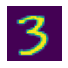

In [11]:
from fastai.vision.data import show_image

show_image(three_tensors[1])

In [12]:
from fastai.vision.data import torch

stacked_threes = torch.stack(three_tensors).float()/255 # type: ignore
stacked_sevens = torch.stack(seven_tensors).float()/255 # type: ignore

# IMPORTANT : commit tensor (1) shape and (2) rank(not dimension) to memory
# Why rank != dimension? 3D position is a 3D vector, but rank is 1 ... leads to rank/dimension word mismatch
# shape is the length of each axis
# stacked_threes shape is => 61631 images, 28 x pixels, 28 y pixels
stacked_threes.shape


torch.Size([6131, 28, 28])

In [21]:
# rank is the number of axes in a tensor, shape is the lenght/size of each axis
# stacked_threes rank is 3 axes => (num of images, x pixels, y pixels)
# stacked_threes.ndim : number of dimensions add to word mismatch
print(f'rank (length of shapes) => {len(stacked_threes.shape)} (or num of dimension) => {stacked_threes.ndim} \nshape (length/size of each axis) {stacked_threes.shape}')

rank (length of shapes) => 3 (or num of dimension) => 3 
shape (length/size of each axis) torch.Size([6131, 28, 28])


<AxesSubplot:>

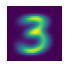

In [22]:
mean3 = stacked_threes.mean(0) # type: ignore
# This is what peak number 3 looks like lol
# output is wispy and willowy where images disagree and solid where they agree
# Just like Tesla FSD Beta visualization lol
# TODO : verify that mean == average; also difference between mean, median and mode
show_image(mean3)

<AxesSubplot:>

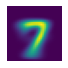

In [23]:
mean7 = stacked_sevens.mean(0) # type: ignore
show_image(mean7)

<AxesSubplot:>

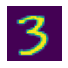

In [24]:
a_3 = stacked_threes[1]
show_image(a_3)

In [25]:
# diff between 3 and mean3 abs and sqr
a_3_mean3_diff = a_3 - mean3
dist_3_abs = a_3_mean3_diff.abs().mean()
dist_3_sqr = (a_3_mean3_diff**2).mean().sqrt()
print(f'abs [{dist_3_abs}] sqr [{dist_3_sqr}]')

abs [0.11143654584884644] sqr [0.20208320021629333]


In [26]:
# diff between 3 and mean7 abs and sqr
a_3_mean7_diff = a_3 - mean7
dist_7_abs = a_3_mean7_diff.abs().mean()
dist_7_sqr = (a_3_mean7_diff**2).mean().sqrt()
print(f'abs [{dist_7_abs}] sqr [{dist_7_sqr}]')

abs [0.15861910581588745] sqr [0.30210891366004944]


In [27]:
import torch.nn.functional as F
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt() # type: ignore

(tensor(0.1586), tensor(0.3021))

In [28]:
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

# Perhaps the most important new coding skill for Python programmers is to use the array and tensor APIs
# printing common exercise outputs
print(f'{arr} # numpy \n{tns} # pytorch') # type: ignore
print(f'{tns[1]} # row')
print(f'{tns[:,1]} # column')
print(f'{tns[1, 1:3]} # row, column slice (end is excluded)')
print(f'{tns+1} # tns+1 standard operator +-*/ works => here we add a scalar one to each element')
print(f'{tns.type()} # tensors have a type')
print(f'{tns*1.5} # type changes as needed => here our int values are converted to float during multiplication')


[[1 2 3]
 [4 5 6]] # numpy 
tensor([[1, 2, 3],
        [4, 5, 6]]) # pytorch
tensor([4, 5, 6]) # row
tensor([2, 5]) # column
tensor([5, 6]) # row, column slice (end is excluded)
tensor([[2, 3, 4],
        [5, 6, 7]]) # tns+1 standard operator +-*/ works => here we add a scalar one to each element
torch.LongTensor # tensors have a type
tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]]) # type changes as needed => here our int values are converted to float during multiplication


In [29]:
# validation set : luckily MNIST is already split into train and valid
valid_3_files = (path/'valid'/'3').ls() # type: ignore
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in valid_3_files])
# TODO : why do we have to convert to float? since we are dividing by 255 that should auto convert to float
# maybe we want to be explicit about the conversion?
valid_3_tens = valid_3_tens.float()/255

valid_7_files = (path/'valid'/'7').ls() # type: ignore
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in valid_7_files])
valid_7_tens = valid_7_tens.float()/255

# Good habit to verify tensor SHAPES as you go
print(f'[SHAPE] 3 => {stacked_threes.shape} # training set \n[SHAPE] 7 => {stacked_sevens.shape} # training set')
print(f'[SHAPE] 3 => {valid_3_tens.shape} # validation set \n[SHAPE] 7 => {valid_7_tens.shape} # validation set')


[SHAPE] 3 => torch.Size([6131, 28, 28]) # training set 
[SHAPE] 7 => torch.Size([6265, 28, 28]) # training set
[SHAPE] 3 => torch.Size([1010, 28, 28]) # validation set 
[SHAPE] 7 => torch.Size([1028, 28, 28]) # validation set


In [30]:
def mnist_distance(a, b):
    # (a-b) is element wise subtraction; pytorch broadcasting! makes tensor code much easier to write
    # broadcasting expands the element with the smaller rank to match the larger rank
    # TODO : here a single scalar (a) is expanded to match array (b) ... but what if (a) is a vector?
    # ANSWER : it actually accumulates tensor([1,2,3]) + tensor(1) + tensor(3) = tensor([5,6,7])
    # Broadcasting is done in C on cpu or cuda on gpu and is 10ks or millions of times faster than python
    # and is the most IMPORTANT feature of pytorch

    # (-1, -2) is a tuple of x,y axes to sum over from shape (num of images (0 or -3 lol), x pixels(-2), y pixels(-1))
    # In other words for every image we averaged the intensity of all pixels in each image using mean()
    # TODO : assumes that tensor shape is 3 dimensional ... what if it is 4 dimensional? Track this implicitly?
    return (a-b).abs().mean((-1, -2))

valid_3_dist = mnist_distance(valid_3_tens, mean3)

print(f'{mnist_distance(a_3, mean3)} distance between single image [3] and single [mean3] image')
print(f'{valid_3_dist} \n{valid_3_dist.shape} # shape of valid_3_dist')


0.11143654584884644 distance between single image [3] and single [mean3] image
tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]) 
torch.Size([1010]) # shape of valid_3_dist


In [31]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

is_3(a_3), is_3(a_3).float() # type: ignore
is_3(valid_3_tens) # with broadcasting we can check the entire validation set at once

tensor([True, True, True,  ..., True, True, True])

In [32]:
accuracy3s = is_3(valid_3_tens).float().mean()
accuracy7s = (1-is_3(valid_7_tens).float()).mean()

# Measuring distance between image and it's mean is a good way to classify images ...
# but to LEARN we need a way for our model to IMPROVE when updated with MORE data (0-9, not just 3 and 7)
# SGD - Stochastic Gradient Descent can test and improve (lift lol) models with WEIGHTS and BIAS
accuracy3s, accuracy7s, (accuracy3s+accuracy7s)/2 # type: ignore

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

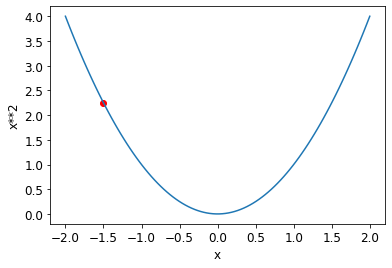

In [33]:
# TODO : didn't know that fastbook was importable, copied search_images_bing string from their earlier lol
from fastbook import plot_function
import matplotlib.pyplot as plt

def f(x):
    return x**2

plot_function(f, 'x', 'x**2')
# f(-1.5) is the y value of the red dot
plt.scatter(-1.5, f(-1.5), color='red')

In [34]:
from fastai.vision.data import torch, tensor

# picking a value where we want gradients
# requires_grad is tagging the value for pytorch to compute gradients for
xt = tensor(3.).requires_grad_()
# pytorch syntax is to focus on the arguments as opposed to the gradient function
# Can be confusing because in math and science, "gradient" of a function is another
# function (it's derivative)
# But in deep learning "gradient" is the value of a function's derivative at a 
# particular argument value, NOT the (derivative) function used to compute the gradient
# That's why pytorch uses "requires_grad_()" to tag the VALUE to compute
# Different focus, but can feel backwards
yt = f(xt)
yt # type: ignore

tensor(9., grad_fn=<PowBackward0>)

In [35]:
# TODO : running this twice errors out ... why?
# ANSWER : because we are trying to run backward() on a tensor that has already been backwarded (?)
# RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors 
# after they have already been freed). Saved intermediate values of the graph are freed when you 
# call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the 
# graph a second time or if you need to access saved tensors after calling backward.

# Here we tell pytorch to calculate the gradient for us
# "backward" refers to backpropagation, life would be easier if "backward" was just called "calculate_grad"
yt.backward()

In [36]:
# we can now view the gradients by checking the grad attribute of our tensor
# Derivative of x**2 is 2*x, and x=3 so the gradient should be 2*3 = 6
xt.grad

tensor(6.)

In [37]:
# apply pytorch gradient calculation to a vector instead of a scalar
xt = tensor([3., 4., 10.]).requires_grad_()
xt # type: ignore

tensor([ 3.,  4., 10.], requires_grad=True)

In [38]:
# update function with sum, so we take a vector (rank-1 tensor) and 
# return a scalar (rank-0 tensor)
# TODO : clarify diff rank-1 and rank-0 vs dimensions
def f_sum(x):
    return (x**2).sum()

In [39]:
# TODO: rerunning without re-init xt tensor is accumulative, why?
yt = f_sum(xt)
yt # type: ignore

tensor(125., grad_fn=<SumBackward0>)

In [40]:
yt.backward()
xt.grad # type: ignore

tensor([ 6.,  8., 20.])

time tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]) 
speed tensor([74.4682, 59.6494, 45.8897, 26.3709, 21.4131, 19.4225, 12.5899, 10.7294,  3.7551, -0.8724, -0.2926,  3.4120,  4.9926, 10.3128, 15.4328, 26.2671, 31.7583, 42.0004, 57.5977, 66.8227])


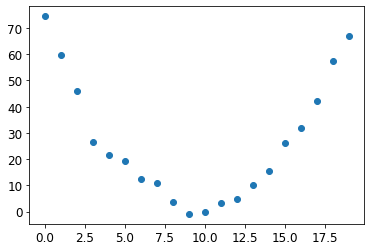

In [41]:
time = torch.arange(0, 20).float(); time #type: ignore
# add noise because measuring things manually is not precise
# this makes "what's the roller coasters speed" difficult to answer
speed = torch.randn(20)*3 + 0.75 * (time-9.5)**2 +1
print(f'time {time} \nspeed {speed}')

plt.scatter(time, speed)

In [42]:
def f_approx_speed(t, params):
    a, b, c = params
    # we are guessing that approx speed is quadratic because we can't consider
    # every possible function derivative
    # TODO : why is QUADRATIC a good guess?
    # ANSWER : quadratic simplifies the problem because it's fully defined by a,b,c?
    # If not a given, how would I know this though lol
    return a*(t**2) + (b*t)+c

def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()


In [43]:
# Initialize parameters
params = torch.randn(3).requires_grad_()
# Calculate predictions
preds = f_approx_speed(time, params)

# calculate loss
loss = mse(preds, speed)

print(f'params: {params} \npreds: {preds} \nloss: {loss} # random loss is very high')

params: tensor([-0.7658, -0.7506,  1.3525], requires_grad=True) 
preds: tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>) 
loss: 160.6978759765625 # random loss is very high


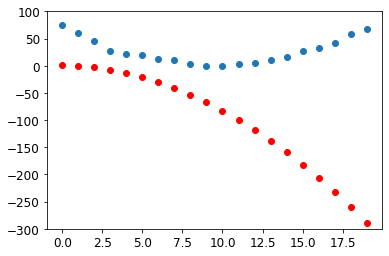

In [44]:
from fastai.torch_core import to_np

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red') # type: ignore convert tensor to numpy array
    ax.set_ylim(-300, 100)

# when we graph the random predictions, it looks like our roller coaster is
# going backwards lol
show_preds(preds)

In [45]:
# calculate the gradient, or an approximation of how the parameters need to change
loss.backward()
params.grad


tensor([-165.5151,  -10.6402,   -0.7900])

In [46]:
params.grad * 1e-5 # type: ignore 1e-5 = 0.00001

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [47]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [48]:
# step the weights in the direction of the gradient
lr = 1e-5
params.data -= lr * params.grad.data # type: ignore
params.grad = None # type: ignore


In [49]:
preds = f_approx_speed(time, params)
mse(preds, speed)

tensor(160.4228, grad_fn=<SqrtBackward0>)

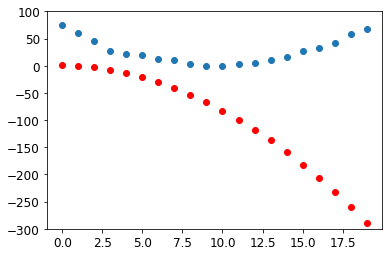

In [50]:
show_preds(preds)

In [51]:
def apply_step(params, prn=True):
    preds = f_approx_speed(time, params)
    loss = mse(preds, speed)
    loss.backward()
    lr = 1e-3 # TODO : why is this a good learning rate? brute force p-hacked 
              # from 1e-5 => 1e-3
    params.data -= lr * params.grad.data
    params.grad = None
    if prn : 
        print(f'apply_step : loss.item => {loss.item()} params.data => {params.data}')
    return preds

In [52]:
# repeat the process
'''
for i in range(10):
    preds = apply_step(params)
'''

'\nfor i in range(10):\n    preds = apply_step(params)\n'

apply_step : loss.item => 160.42279052734375 params.data => tensor([-0.5987, -0.7399,  1.3533])
apply_step : loss.item => 132.9931182861328 params.data => tensor([-0.4342, -0.7293,  1.3541])
apply_step : loss.item => 105.96342468261719 params.data => tensor([-0.2716, -0.7188,  1.3550])
apply_step : loss.item => 79.701171875 params.data => tensor([-0.1131, -0.7086,  1.3558])


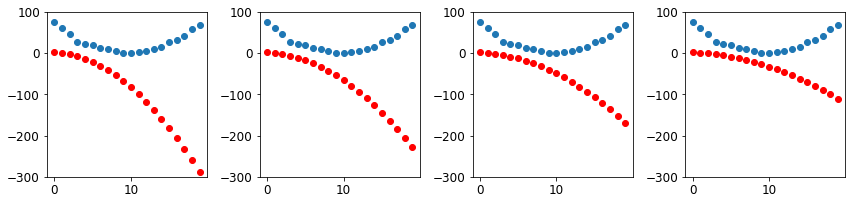

In [53]:
_,axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, True), ax)
# TODO : why doen't this show a larger convergence? why does it look like it's still
# Answer : needed to comment out # repeat the process cell
plt.tight_layout()

In [54]:
# MNIST Loss Function
# The MNIST images ar our x (the independent variable)
# Let's concanete all the 3s and all the 7s into a single tensor
# And format them from a rank-3 tensor (list of matrices) to a 
# rank-2 tensor (a list of vectors)
# .view is a Pytorch that changes tensor shape without content changes
# -1 is a special parameter that "make this axis as big as necessary to fit all 
# the data"
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

# create a tensor of labels for the images, we'll use 1 for 3s and 0 for 7s
# unsqueeze adds a dimension of size 1 at the specified index ... 
# Ah ... [1]*len(threes) generate a 6131 list of 1s and [0]*len(sevens) 
# generates a 6265 list of 0s ... 
# TODO : why is this a list of 1s and 0s?
# ANSWER : because we only have 2 classes, 3s and 7s, and are hashing to 0 or 1
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
print(f'train_x.shape {train_x.shape} train_y.shape {train_y.shape}')
print(f'threes {len(threes)} sevens {len(sevens)}')


dset = list(zip(train_x, train_y))
x,y = dset[0]
print(f'x.shape {x.shape} y {y}')

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))


train_x.shape torch.Size([12396, 784]) train_y.shape torch.Size([12396, 1])
threes 6131 sevens 6265
x.shape torch.Size([784]) y tensor([1])


In [55]:
# MNIST Initialize Weights
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

# line is y= (weights * x) + bias // where x = each MNIST image
# together weights and bias makeup the parameters, so we need to initialize them
weights = init_params((28*28, 1))
bias = init_params(1)

In [56]:
(train_x[0] * weights.T).sum() + bias #type: ignore

tensor([20.2336], grad_fn=<AddBackward0>)

In [57]:
def linear1(xb):
    # @ is matrix multiplication in Python
    return xb@weights + bias # type: ignore

preds = linear1(train_x)
print(f'{preds}')

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)


In [58]:
corrects = (preds>0.0).float() == train_y
print(f'{corrects}')
print(f'{corrects.float().mean()} # mean of corrects is the accuracy')

# what happens when there is a small change in the weights?
# TODO : to prevent leaf variable error ... why?
# Commenting out weight in place of weights[0] does not work ... figure out later
# weights[0] *= 1.0001


tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])
0.4912068545818329 # mean of corrects is the accuracy


In [59]:
preds = linear1(train_x)
# TODO : why is this not the same as the previous corrects? ... also true in book
print(f'{((preds>0.0).float() == train_y).float().mean()} # after small change in weights')

0.4912068545818329 # after small change in weights


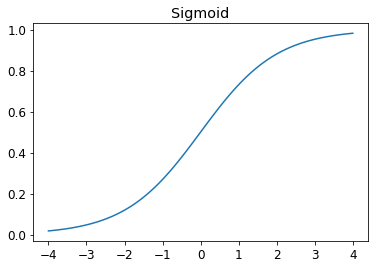

In [60]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x):
    return 1/(1+torch.exp(-x))

plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [61]:
trgts = tensor([1,0,1])
preds = tensor([0.9, 0.4, 0.2])

torch.where(trgts==1, 1-preds, preds)
mnist_loss(preds, trgts)
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.3993)

In [62]:
from fastai.vision.data import DataLoader
# Optimization step for SGD
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [63]:
from fastai.vision.data import L, string
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [64]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [65]:
from fastai.vision.data import first
'''
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
'''

weights = init_params(28*28, 1)
bias = init_params(1)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl) #type: ignore
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [66]:
# setup validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

In [67]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])
preds = linear1(batch)
preds

tensor([-2.1876, -8.3973,  2.5000, -4.9473], grad_fn=<AddBackward0>)

In [68]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [69]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad # type: ignore

(torch.Size([784]), tensor(-0.0061), tensor([-0.0420]))

In [70]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [72]:
# NOTE : fastai functions with _ are inplace => zero_()
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [73]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad # type: ignore

(tensor(-0.0061), tensor([-0.0420]))

In [74]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

(preds>0.5).float() == train_y[:4]

tensor([[False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False]])

In [75]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5).float() == yb
    return correct.float().mean()

In [76]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [77]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [78]:
validate_epoch(linear1)

0.5247

In [79]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6675

In [80]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(f'epoch {i} {validate_epoch(linear1)}')

epoch 0 0.8205
epoch 1 0.8786
epoch 2 0.9075
epoch 3 0.9166
epoch 4 0.9285
epoch 5 0.9343
epoch 6 0.9372
epoch 7 0.9405
epoch 8 0.9438
epoch 9 0.9457
epoch 10 0.9471
epoch 11 0.9486
epoch 12 0.9491
epoch 13 0.9496
epoch 14 0.951
epoch 15 0.9515
epoch 16 0.9524
epoch 17 0.9539
epoch 18 0.9543
epoch 19 0.9538


In [81]:
from fastai.vision.data import nn

linear_model = nn.Linear(28*28, 1)
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [82]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [84]:
opt = BasicOptim(linear_model.parameters(), lr)

In [86]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [87]:
validate_epoch(linear_model)

0.4606

In [88]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(f' epoch {i} {validate_epoch(model)}')

In [89]:
train_model(linear_model, 20)

 epoch 0 0.4932
 epoch 1 0.7686
 epoch 2 0.8554
 epoch 3 0.9136
 epoch 4 0.9346
 epoch 5 0.9482
 epoch 6 0.957
 epoch 7 0.9634
 epoch 8 0.9658
 epoch 9 0.9678
 epoch 10 0.9697
 epoch 11 0.9717
 epoch 12 0.9736
 epoch 13 0.9746
 epoch 14 0.9761
 epoch 15 0.977
 epoch 16 0.9775
 epoch 17 0.9775
 epoch 18 0.978
 epoch 19 0.9785


In [90]:
from fastai.vision.learner import SGD

linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

 epoch 0 0.4932
 epoch 1 0.8179
 epoch 2 0.8496
 epoch 3 0.914
 epoch 4 0.9346
 epoch 5 0.9482
 epoch 6 0.957
 epoch 7 0.9619
 epoch 8 0.9658
 epoch 9 0.9673
 epoch 10 0.9692
 epoch 11 0.9712
 epoch 12 0.9741
 epoch 13 0.9751
 epoch 14 0.9761
 epoch 15 0.9775
 epoch 16 0.9775
 epoch 17 0.978
 epoch 18 0.9785
 epoch 19 0.979


In [91]:
from fastai.vision.learner import DataLoaders, Learner, SGD

dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy) # type: ignore
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00
